# Hello, today I want to introduce you with my implementation K-Nearest Neighbors Classifier method.


Let's start with download handwritten digits dataset.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
len(mnist['data'])

70000

Now I will divide this set into, **X** which will describe to us a picture of a digit in the size of 28x28 pixels, while **y** is responsible for recognizing the corresponding number

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
len(X)

70000

In [6]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Let's display a random number

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def show_img(array, index):
    img = array[index].reshape(28, 28)
    plt.imshow(img, cmap="binary")
    plt.axis("off")
    plt.show()
    
def show_img2(img):
    plt.imshow(img.reshape(28, 28), cmap="binary")
    plt.axis("off")
    plt.show()

In [8]:
X = np.array(X)/255

In [9]:
y = np.array(y)

In [10]:
random_value = np.random.randint(len(X))
random_value

9514

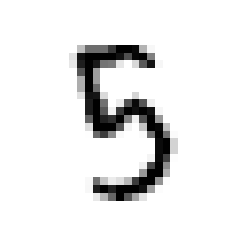

Number on image: 5


In [11]:
show_img(np.array(X), random_value)
print(f'Number on image: {y[random_value]}')

Let's divide our data into a training and testing set

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

## K-Nearest Neighbors raw implementation

In [14]:
from math import sqrt
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i]) ** 2
    return sqrt(distance)

In [15]:
def get_neighbors(train, test_row, num_neighbors):
    distances = []
    indexes = []
    for i, train_row in enumerate(train):
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist, i))

    distances.sort(key=lambda tup: tup[1])

    neighbors = []
    idx = []
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
        idx.append(distances[i][2])

    return neighbors, idx

In [16]:
random_value = np.random.randint(len(X_test))
random_value

701

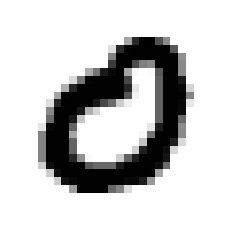

(None, '0')

In [17]:
row_new = X_test[random_value]
show_img2(row_new), y_test[random_value]

Let's check our prediction

In [18]:
neighbors, correct_sort = get_neighbors(X_train, row_new, 10)

In [19]:
correct = [y_train[index] for index in correct_sort]
for value in correct:
    print(value, end=' ')

most_c = sorted(correct, key=lambda i: correct.count(i))[-1]

print(f"\nThe most common value in class is : {most_c}")

0 0 0 0 0 0 0 0 0 0 
The most common value in class is : 0


So our predictions agree with the above answer